## Run inference on trained model.

In [1]:
import os
import sys
import time
import pickle
import autograd.numpy as np
import numpy as onp
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.style as mplstyle

sns.set_palette('bright')
mplstyle.use('fast')

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%load_ext autoreload
%autoreload 2
np.set_printoptions(precision=3, linewidth=500, edgeitems=15, suppress=True)

import utils.file_io as io

In [2]:
from runners.runner_tf import RunnerTF
from utils.attr_dict import AttrDict

log_dir = os.path.abspath('../../gauge_logs/2020_05_14/L8_b1024_lf4_GaugeNetwork_aw00_qw01_pw01_dp05_f32_0033/')

FLAGS = AttrDict({
    'beta': 5.,
    'log_dir': log_dir,
    'eps': None,
    'batch_size': None,
    'hmc': True,
    'run_steps': 5000,
    'plot_chains': 8,
    'print_steps': 100,
})

runner = RunnerTF(FLAGS)




INFO:tensorflow:Restoring parameters from /Users/saforem2/l2hmc-qcd/gauge_logs/2020_05_14/L8_b1024_lf4_GaugeNetwork_aw00_qw01_pw01_dp05_f32_0033/checkpoints/model.ckpt-100000


Creating directory: /Users/saforem2/l2hmc-qcd/gauge_logs/2020_05_14/L8_b1024_lf4_GaugeNetwork_aw00_qw01_pw01_dp05_f32_0033/runs_tf/lf4_bs1024_steps5000_beta5.0_eps0.14_nw000000__2020_05_19_1609
Creating directory: /Users/saforem2/l2hmc-qcd/gauge_logs/2020_05_14/L8_b1024_lf4_GaugeNetwork_aw00_qw01_pw01_dp05_f32_0033/figures_tf/lf4_bs1024_steps5000_beta5.0_eps0.14_nw000000__2020_05_19_1609


In [32]:
x = np.arange(24).reshape((3, 2, 2, 2))
x

array([[[[ 0,  1],
         [ 2,  3]],

        [[ 4,  5],
         [ 6,  7]]],


       [[[ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15]]],


       [[[16, 17],
         [18, 19]],

        [[20, 21],
         [22, 23]]]])

In [33]:
xf = x.reshape((3, -1))
xf

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23]])

In [38]:
m = np.arange(24) % 2
m = m.reshape((3, 2, 2, 2))

In [40]:
z = m * x
z.reshape(3, -1)

array([[ 0,  1,  0,  3,  0,  5,  0,  7],
       [ 0,  9,  0, 11,  0, 13,  0, 15],
       [ 0, 17,  0, 19,  0, 21,  0, 23]])

In [31]:
print(f'x[0]:\n----\n\n {x[0]}\n\n')
print(f'x[1]:\n----\n\n {x[1]}\n\n')
print(f'x[2]:\n----\n\n {x[2]}\n\n')

x[0]:
----

 [[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]


x[1]:
----

 [[[ 8  9]
  [10 11]]

 [[12 13]
  [14 15]]]


x[2]:
----

 [[[16 17]
  [18 19]]

 [[20 21]
  [22 23]]]




In [6]:
run_data = runner.inference(FLAGS.run_steps)

------------------------------------------------------------------------------------
    step         dt          px      sumlogdet    exp(dH)        dQ       plaq_err  
------------------------------------------------------------------------------------
     0/5000     0.1815         1           0       1.232e+04       0         0.894    
------------------------------------------------------------------------------------
    step         dt          px      sumlogdet    exp(dH)        dQ       plaq_err  
------------------------------------------------------------------------------------
   100/5000     0.3405      0.8218         0         1.081       62.19     0.004204   
   200/5000     0.3503      0.8308         0         1.098       61.12      0.00342   
   300/5000     0.4012      0.8246         0         1.103       64.82     0.002211   
   400/5000      0.311      0.8218         0         1.084       62.23     0.0004031  
   500/5000     0.3469      0.8151         0         1.

--------------------------------------------------------------------------------
Saving figure to: /Users/saforem2/l2hmc-qcd/gauge_logs/2020_05_14/L8_b1024_lf4_GaugeNetwork_aw00_qw01_pw01_dp05_f32_0033/figures_tf/lf4_bs1024_steps5000_beta5.0_eps0.14_nw000000__2020_05_19_1609/run_data__traceplot.png.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Saving figure to: /Users/saforem2/l2hmc-qcd/gauge_logs/2020_05_14/L8_b1024_lf4_GaugeNetwork_aw00_qw01_pw01_dp05_f32_0033/figures_tf/lf4_bs1024_steps5000_beta5.0_eps0.14_nw000000__2020_05_19_1609/run_data__posterior.png.
--------------------------------------------------------------------------------


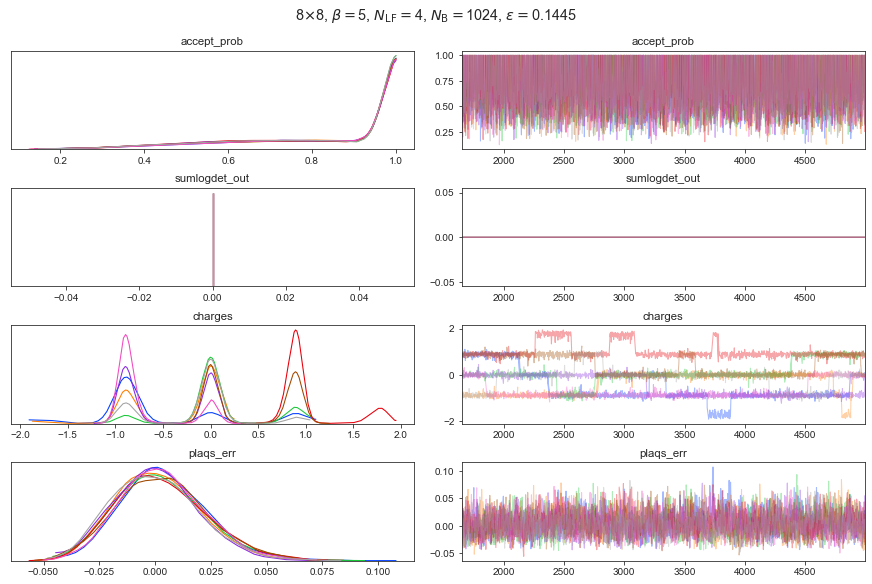

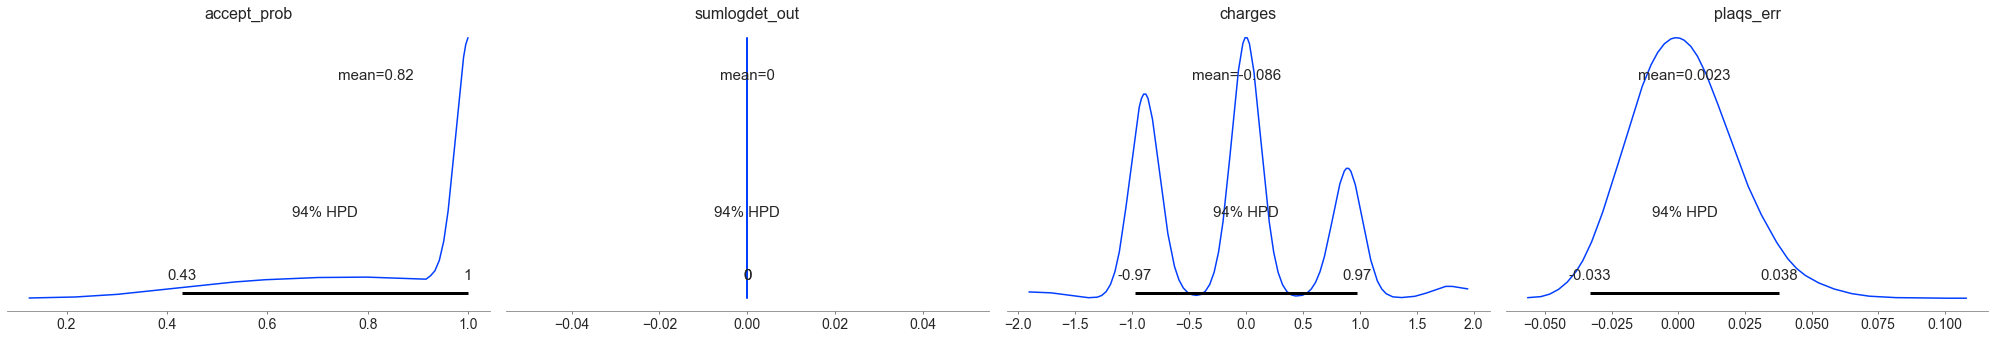

In [12]:
run_data.plot(runner.fig_dir, runner.title_str, num_chains=FLAGS.plot_chains)

In [14]:
import shutil

out_file = os.path.join(runner.fig_dir, 'run_summary.txt')
_, _ = run_data.log_summary(out_file, n_boot=10)
_ = shutil.copy2(out_file, runner.run_dir)

Writing run summary statistics to /Users/saforem2/l2hmc-qcd/gauge_logs/2020_05_14/L8_b1024_lf4_GaugeNetwork_aw00_qw01_pw01_dp05_f32_0033/figures_tf/lf4_bs1024_steps5000_beta5.0_eps0.14_nw000000__2020_05_19_1609/run_summary.txt.

--------------------------------------------------------------------------------


< tunneling_events > = 7.59473
------------------------------
    [15. 11.  9. 26.  4.  9.  2.  9. 10.  4. 18.  7. 16. 12. 10. ...  9.  7.  6.  7.  8. 12.  6.  9. 14.  7. 11. 10.  3.  4. 10.]

< tunneling_rate > = 0.00226708
-------------------------------
    [0.004 0.003 0.003 0.008 0.001 0.003 0.001 0.003 0.003 0.001 0.005 0.002 0.005 0.004 0.003 ... 0.003 0.002 0.002 0.002 0.002 0.004 0.002 0.003 0.004 0.002 0.003 0.003 0.001 0.001 0.003]

< accept_prob > = 0.817477 +/- 0.00330328
-----------------------------------------
    [0.818 0.821 0.816 0.811 0.813 0.816 0.817 0.819 0.823 0.821 0.823 0.82  0.814 0.819 0.811 ... 0.819 0.818 0.814 0.818 0.816 0.82  0.818 0.814 0.815 0.8

In [4]:
runner.print_steps

100

In [ ]:
run_data = runner.inference(FLAGS.run_steps)

In [8]:
def _get_eps():
    eps = [i for i in tf.global_variables() if 'eps' in i.name][0]
    return eps


def get_run_ops():
    keys = ['x_init', 'v_init', 'x_proposed', 'v_proposed',
            'x_out', 'v_out', 'dx_out', 'dx_proposed', 'exp_energy_diff',
            'accept_prob', 'sumlogdet_proposed', 'sumlogdet_out']

    ops = tf.get_collection('run_ops')

    run_ops_dict = dict(zip(keys, ops))
    eps = _get_eps()
    run_ops_dict.update({'dynamics_eps': eps})
    
    return run_ops_dict


def get_obs_ops():
    """Build dictionary of tensorflow ops for calculating observables."""
    keys = ['plaq_sums', 'actions', 'plaqs',
            'charges', 'avg_plaqs', 'avg_actions']
    ops = tf.get_collection('observables')
    obs_ops_dict = dict(zip(keys, ops))

    return obs_ops_dict


def get_inputs():
    """Build dictionary of tensorflow placeholders used as inputs."""
    inputs = tf.get_collection('inputs')
    x, beta, eps_ph, global_step_ph, train_phase, *nw = inputs
    net_weights = NetWeights(*nw)
    inputs_dict = {
        'x': x,
        'beta': beta,
        'eps_ph': eps_ph,
        'global_step_ph': global_step_ph,
        'train_phase': train_phase,
        'net_weights': net_weights,
    }

    return inputs_dict

In [2]:
log_dir = os.path.abspath('../../gauge_logs/2020_05_14/L8_b1024_lf4_GaugeNetwork_aw00_qw01_pw01_dp05_f32_0033/')
params = io.loadz(os.path.join(log_dir, 'params.z'))

config = tf.ConfigProto(allow_soft_placement=True)
sess = tf.Session(config=config)

checkpoint_dir = os.path.join(log_dir, 'checkpoints')
checkpoint_file = tf.train.latest_checkpoint(checkpoint_dir)
saver = tf.train.import_meta_graph(f'{checkpoint_file}.meta')
saver.restore(sess, checkpoint_file)


INFO:tensorflow:Restoring parameters from /Users/saforem2/l2hmc-qcd/gauge_logs/2020_05_14/L8_b1024_lf4_GaugeNetwork_aw00_qw01_pw01_dp05_f32_0033/checkpoints/model.ckpt-100000


In [3]:
from config import NetWeights

net_weights = NetWeights(1., 1., 1., 1., 1., 1.)
beta_inference = 5.
batch_size = params['batch_size']
xdim = params['time_size'] * params['space_size'] * params['dim']
samples_init = tf.random.uniform((batch_size, xdim), minval=-np.pi, maxval=np.pi)

In [9]:
run_ops = get_run_ops()
obs_ops = get_obs_ops()
inputs = get_inputs()

In [31]:
import time
from config import NET_WEIGHTS_L2HMC
from lattice.lattice import calc_plaqs_diffs

names = ['step', 'dt', 'px', 'sumlogdet', 'exp(dH)', 'dQ', 'plaq_err']
hstr = ''.join(["{:^12s}".format(name) for name in names])
sep = '-' * len(hstr)
header = sep + '\n' + hstr + '\n' + sep

ops_dict = {
    'x_out': run_ops['x_out'],
    'accept_prob': run_ops['accept_prob'],
    'sumlogdet_out': run_ops['sumlogdet_out'],
    'exp_energy_diff': run_ops['exp_energy_diff'],
    'plaq_sums': obs_ops['plaq_sums'],
    'plaqs': obs_ops['plaqs'],
    'charges': obs_ops['charges'],
}

keys = list(ops_dict.keys())
ops = list(ops_dict.values())
run_steps = 5000
#eps = sess.run(run_ops['dyn'])
eps = sess.run(run_ops['dynamics_eps'])

run_data = {}

def run_step(sess, step, x, beta, net_weights=NET_WEIGHTS_L2HMC):
    feed_dict = {
        inputs['x']: x,
        inputs['beta']: beta,
        inputs['net_weights']: net_weights,
        inputs['train_phase']: False
    }
    
    t0 = time.time()
    outputs = sess.run(ops, feed_dict=feed_dict)
    dt = time.time() - t0
    
    out_dict = dict(zip(keys, outputs))
    
    if step > 1:
        q_old = np.array(run_data['charges'][-1])
        q_new = np.array(out_dict['charges'])
        dq = np.sum(np.abs(q_new - q_old))
    else:
        dq = 0.
        
    plaq_err = calc_plaqs_diffs(out_dict['plaqs'], beta)
    
    data_str = (f"{step:>6g}/{run_steps:<6g} "
                f"{dt:^11.4g} "
                f"{np.mean(out_dict['accept_prob']):^11.4g} "
                f"{np.mean(out_dict['sumlogdet_out']):^11.4g} "
                f"{np.mean(out_dict['exp_energy_diff']):^11.4g} "
                f"{dq:^11.4g} "
                f"{np.mean(plaq_err):^11.4g} ")
    
    return out_dict, data_str

In [32]:
def run(run_steps, beta, net_weights):
    print(header)
    data_strs = []
    #x = tf.random.uniform((batch_size, xdim), minval=-np.pi, maxval=np.pi)
    x = np.random.uniform(low=-np.pi, high=np.pi, size=(batch_size, xdim))
    beta = 5.
    for step in range(run_steps):
        outputs, data_str = run_step(sess, step, x, beta)
        x = outputs['x_out']
        for key, val in outputs.items():
            try:
                run_data[key].append(val)
            except KeyError:
                run_data[key] = [val]

        data_strs.append(data_str)
        if step % 10 == 0:
            print(data_str)

        if step % 1000 == 0:
            print(header)

    step         dt          px      sumlogdet       dQ       plaq_err  
------------------------------------------------------------------------
     0/5000     0.2808      0.05681    9.603e-06       0        0.8936    
    step         dt          px      sumlogdet       dQ       plaq_err  
------------------------------------------------------------------------
    10/5000     0.2125      0.3787     -1.68e-05     97.24      0.5891    
    20/5000     0.2157      0.5703     9.602e-06     90.04      0.3992    
    30/5000     0.2944      0.6913     -2.16e-05     93.6       0.2666    
    40/5000     0.2803      0.7571     -1.2e-06      85.61      0.1856    
    50/5000     0.2725      0.8082    -5.281e-05      85        0.1255    
    60/5000     0.2469       0.834    -3.361e-05     78.07      0.09364   
    70/5000     0.2373       0.844     8.402e-06     77.47      0.07083   
    80/5000     0.2734      0.8713    -3.961e-05     72.71      0.05299   
    90/5000     0.2509      0.866

  1040/5000     0.1952      0.9052     5.041e-05     67.06     0.001349   
  1050/5000     0.2015      0.8944    -2.641e-05     66.13     0.001264   
  1060/5000     0.1763       0.907     -1.44e-05     70.56     0.001221   
  1070/5000     0.1773      0.9019     4.081e-05     69.98     0.0004595  
  1080/5000      0.186      0.9031     3.121e-05     63.32     0.001114   
  1090/5000     0.1685      0.9017    -9.602e-06     64.27     0.0001454  
  1100/5000     0.1965      0.9069     8.402e-06     66.52     0.001496   
  1110/5000     0.2083      0.8982     4.801e-06     65.57     0.000377   
  1120/5000     0.1954      0.9011    -5.641e-05     65.97     0.001083   
  1130/5000     0.1901      0.8985     3.841e-05     75.51     0.0008726  
  1140/5000     0.1648      0.9068     2.28e-05      67.16     0.0005137  
  1150/5000     0.1842      0.9065     2.881e-05     61.88     0.0003787  
  1160/5000     0.1791      0.8979    -4.801e-06     68.78     0.0004991  
  1170/5000     0.1684   

  2120/5000     0.1941      0.9023     6.001e-06     66.39     -0.001075  
  2130/5000     0.1794      0.9036    -9.602e-06     68.99    -0.0004239  
  2140/5000     0.2105      0.9049     2.16e-05      66.26    -0.0007384  
  2150/5000     0.2294      0.9068     -1.08e-05     68.39     0.0007504  
  2160/5000     0.1986      0.9001      1.2e-05      64.47     0.0004223  
  2170/5000     0.2207      0.9041     2.16e-05      67.03     0.0009644  
  2180/5000     0.1957      0.9001     3.721e-05     64.59    -0.0002227  
  2190/5000      0.168      0.9039    -3.721e-05     66.14     0.0001462  
  2200/5000     0.1671      0.9098     -1.44e-05     64.32     8.16e-05   
  2210/5000     0.1743      0.8979     4.561e-05     65.4     -0.0009184  
  2220/5000     0.1801      0.9018     2.641e-05     67.35     0.0001489  
  2230/5000     0.1951      0.9056    -3.001e-05     64.26    -0.0008192  
  2240/5000     0.1829      0.9049    -3.241e-05     64.54    -0.0006074  
  2250/5000      0.185   

  3200/5000     0.1878      0.9035     6.001e-06     66.51     -0.001281  
  3210/5000     0.1924      0.9156    -3.601e-06     66.22    -0.0004783  
  3220/5000      0.19       0.9052     4.321e-05     64.46     -3.36e-05  
  3230/5000      0.178      0.8901     3.121e-05     66.17     0.0004223  
  3240/5000     0.2279      0.9036     -1.2e-06      65.76    -0.0007407  
  3250/5000     0.1889      0.8936     2.761e-05     63.81    -0.0002177  
  3260/5000     0.1647      0.8911    -4.921e-05     66.42    -0.0003124  
  3270/5000     0.1803      0.8977     9.602e-06     65.22    -0.0007233  
  3280/5000     0.2035       0.898     -2.04e-05     68.04    -0.0006693  
  3290/5000      0.184      0.9008    -7.682e-05     68.65     -0.000732  
  3300/5000     0.1754      0.9021    -6.121e-05     66.65    -0.0007373  
  3310/5000     0.2059      0.9043     3.961e-05     63.38    -0.0005683  
  3320/5000     0.1994      0.9036    -3.481e-05     64.29     -0.000446  
  3330/5000     0.1735   

  4280/5000     0.1717      0.9066     3.001e-05     67.15    -0.0001919  
  4290/5000     0.1649      0.9011     -2.4e-05      62.85     0.0002251  
  4300/5000     0.1828      0.9033     5.881e-05     62.59    -9.499e-05  
  4310/5000     0.1945      0.9018     3.001e-05     65.27      0.00095   
  4320/5000     0.1792      0.9078     3.601e-06     67.08     -7.55e-05  
  4330/5000     0.1708       0.904     4.801e-06     66.12    -0.0002159  
  4340/5000     0.1651      0.9031     3.361e-05     62.5     -0.0001424  
  4350/5000     0.1802      0.9051     -1.56e-05     66.54     0.0005207  
  4360/5000      0.194      0.9046     -1.8e-05      63.21     -3.62e-05  
  4370/5000     0.1812      0.9011     3.001e-05     65.98     0.0006991  
  4380/5000     0.1853      0.9028    -7.442e-05     63.45    -0.0002964  
  4390/5000     0.1686      0.8983     4.561e-05     65.06     0.0005193  
  4400/5000     0.1791      0.8983     -1.08e-05     65.24     8.578e-05  
  4410/5000     0.1807   

In [33]:
for key, val in run_data.items():
    print(f'{key}: {np.array(val).shape}\n')

x_out: (5000, 1024, 128)

accept_prob: (5000, 1024)

sumlogdet_out: (5000, 1024)

plaq_sums: (5000, 1024, 8, 8)

plaqs: (5000, 1024)

charges: (5000, 1024)



In [49]:
import xarray as xr

from plotters.data_utils import therm_arr 

def build_dataset(data, filter_str=None, therm_frac=0.33, num_chains=None):
    d = {}
    therm_data = {}
    for key, val in data.items():
        cond1 = (filter_str is not None and filter_str in key)
        cond2 = (val == [])
        if cond1 or cond2:
            continue
        arr, steps = therm_arr(np.array(val), therm_frac=therm_frac)
        therm_data[key] = arr
        arr = arr.T
        if num_chains is not None:
            arr = arr[:num_chains]
            
        chains = np.arange(arr.shape[0])
        d[key] = xr.DataArray(arr, dims=['chain', 'draw'],
                              coords=[chains, steps])
    dataset = xr.Dataset(d)
    
    return dataset, therm_data

In [50]:
def calc_dq(q):
    q = np.insert(q, 0, q[0], axis=0)
    return np.abs(np.around(q[1:]) - np.around(q[:-1]))

In [51]:
plot_keys = ['accept_prob', 'sumlogdet_out', 'charges']
plot_data = {
    key: run_data[key] for key in plot_keys
}
plot_data['plaqs_err'] = calc_plaqs_diffs(np.array(run_data['plaqs']), beta)

#plot_data['dq']

dataset = build_dataset(plot_data, num_chains=12)

/Users/saforem2/opt/anaconda3/envs/tf15_src/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


In [42]:
def get_title_str(params, batch_size=None, eps=None):
    if batch_size is None:
        batch_size = params['batch_size']
    if eps is None:
        eps = sess.run(run_ops['dynamics_eps'])
        
    title_str = (f"{params['time_size']}"
                 r"$\times$" + f"{params['space_size']}, "
                 r"$\beta = $" + f'{beta:.3g}, '
                 r"$N_{\mathrm{LF}} = $" + f"{params['num_steps']}, "
                 r"$N_{\mathrm{B}} = $" + f'{batch_size}, '
                 r"$\varepsilon = $" + f'{eps:.4g}') 
    
    return title_str

In [ ]:
from plotters.inference_plots import traceplot_posterior

title_str = get_title_str(params)


lf = params['num_steps']
bs = params['batch_size']
rs = run_steps
beta = beta
eps = eps
nw = net_weights
tstr = io.get_timestr()
tstr = tstr['timestr']
nwstr = ''.join([str(int(i)) for i in net_weights])

run_str = f'lf{lf}_bs{bs}_steps{rs}_beta{beta}_eps{eps:.2g}_nw{nwstr}__{tstr}'
run_dir = os.path.join(log_dir, 'runs_tf', run_str)
fig_dir = os.path.join(log_dir, 'figures_tf', run_str)
io.check_else_make_dir(run_dir)
io.check_else_make_dir(fig_dir)

traceplot_posterior(dataset, '', fname='run_data',
                    fig_dir=fig_dir, title_str=title_str)

In [53]:
run_params = {
    'num_steps': params['num_steps'],
    'batch_size': params['batch_size'],
    'run_steps': run_steps,
    'beta': beta,
    'eps': eps,
    'nw': net_weights,
}
io.save_dict(run_params, run_dir, name='run_params')

for key, val in run_data.items():
    out_file = os.path.join(run_dir, f'{key}.z')
    io.savez(np.array(val), out_file, name=key)

Saving run_params to /Users/saforem2/l2hmc-qcd/gauge_logs/2020_05_14/L8_b1024_lf4_GaugeNetwork_aw00_qw01_pw01_dp05_f32_0033/runs_tf/lf4_bs1024_steps5000_beta5.0_eps0.14_nw111111__2020_05_19_1355/run_params.z.
Saving x_out to /Users/saforem2/l2hmc-qcd/gauge_logs/2020_05_14/L8_b1024_lf4_GaugeNetwork_aw00_qw01_pw01_dp05_f32_0033/runs_tf/lf4_bs1024_steps5000_beta5.0_eps0.14_nw111111__2020_05_19_1355/x_out.z.
Saving accept_prob to /Users/saforem2/l2hmc-qcd/gauge_logs/2020_05_14/L8_b1024_lf4_GaugeNetwork_aw00_qw01_pw01_dp05_f32_0033/runs_tf/lf4_bs1024_steps5000_beta5.0_eps0.14_nw111111__2020_05_19_1355/accept_prob.z.
Saving sumlogdet_out to /Users/saforem2/l2hmc-qcd/gauge_logs/2020_05_14/L8_b1024_lf4_GaugeNetwork_aw00_qw01_pw01_dp05_f32_0033/runs_tf/lf4_bs1024_steps5000_beta5.0_eps0.14_nw111111__2020_05_19_1355/sumlogdet_out.z.
Saving plaq_sums to /Users/saforem2/l2hmc-qcd/gauge_logs/2020_05_14/L8_b1024_lf4_GaugeNetwork_aw00_qw01_pw01_dp05_f32_0033/runs_tf/lf4_bs1024_steps5000_beta5.0_eps0.1

Creating directory: /Users/saforem2/l2hmc-qcd/gauge_logs/2020_05_14/L8_b1024_lf4_GaugeNetwork_aw00_qw01_pw01_dp05_f32_0033/runs_tf/lf4_bs1024_steps5000_beta5.0_eps0.14_nw111111__2020_05_19_1345
Creating directory: /Users/saforem2/l2hmc-qcd/gauge_logs/2020_05_14/L8_b1024_lf4_GaugeNetwork_aw00_qw01_pw01_dp05_f32_0033/figures_tf/lf4_bs1024_steps5000_beta5.0_eps0.14_nw111111__2020_05_19_1345
--------------------------------------------------------------------------------
Saving figure to: /Users/saforem2/l2hmc-qcd/gauge_logs/2020_05_14/L8_b1024_lf4_GaugeNetwork_aw00_qw01_pw01_dp05_f32_0033/figures_tf/lf4_bs1024_steps5000_beta5.0_eps0.14_nw111111__2020_05_19_1345/run_data__traceplot.png.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Saving figure to: /Users/saforem2/l2hmc-qcd/gauge_logs/2020_05_14/L8_b1024_lf4_GaugeNetwork_aw00_qw01_pw01_dp05_f32_0033/figures_tf/lf4_bs1024_ste

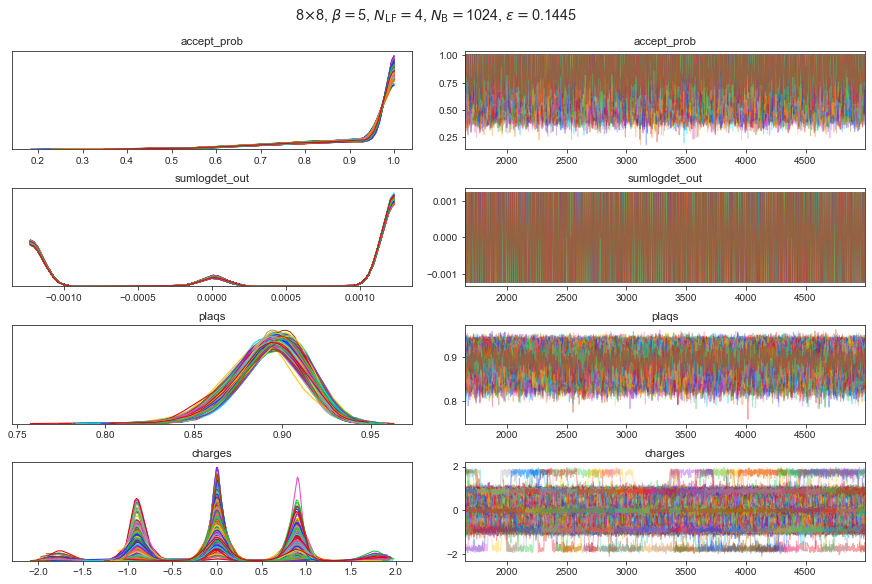

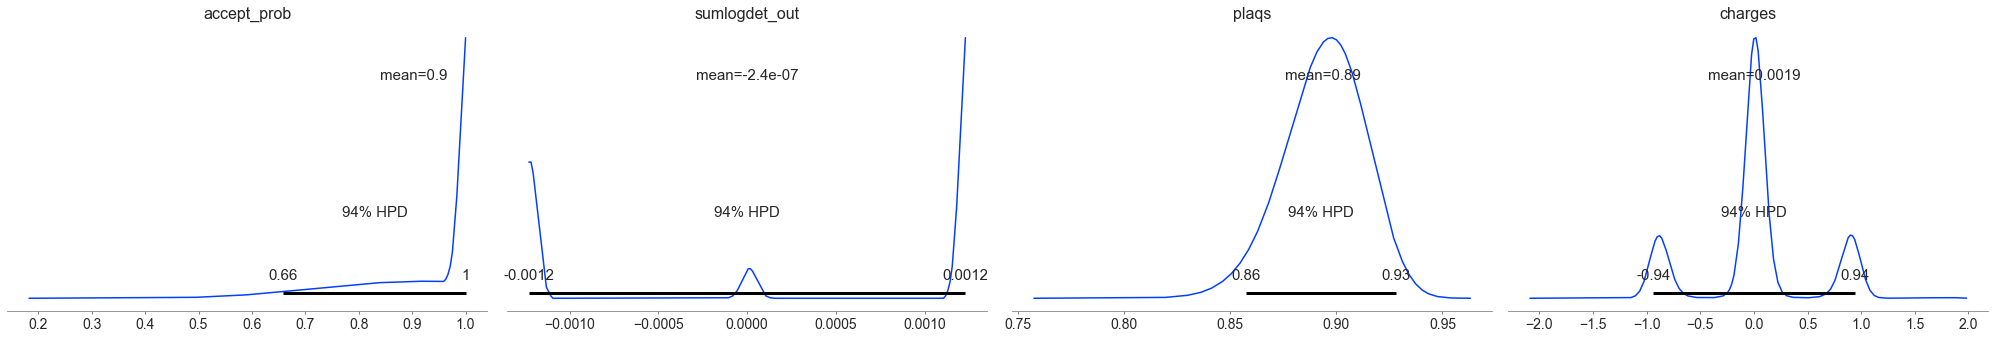

In [48]:
from plotters.inference_plots import traceplot_posterior

title_str = get_title_str(params)

lf = params['num_steps']
bs = params['batch_size']
rs = run_steps
beta = beta
eps = eps
nw = net_weights
tstr = io.get_timestr()
tstr = tstr['timestr']
nwstr = ''.join([str(int(i)) for i in net_weights])

run_str = f'lf{lf}_bs{bs}_steps{rs}_beta{beta}_eps{eps:.2g}_nw{nwstr}__{tstr}'
run_dir = os.path.join(log_dir, 'runs_tf', run_str)
fig_dir = os.path.join(log_dir, 'figures_tf', run_str)
io.check_else_make_dir(run_dir)
io.check_else_make_dir(fig_dir)

traceplot_posterior(dataset, '', fname='run_data',
                    fig_dir=fig_dir, title_str=title_str)